In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn import svm
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
!pip install scikit-plot

In [13]:
weather=pd.read_csv("temp.csv", names=['Weather','Temparature','Humidity','Wind','Play'], header=0)
weather['Play'],class_names = pd.factorize(weather['Play'])
weather.head()

,Weather,Temparature,Humidity,Wind,Play
1,Sunny,Hot,High,Weak,0
2,Cloudy,Hot,High,Weak,1
3,Sunny,Mild,Normal,Strong,1
4,Cloudy,Mild,High,Strong,1
5,Rainy,Mild,High,Strong,0


In [14]:
weather['Weather'],_=pd.factorize(weather['Weather'])
weather['Temparature'],_=pd.factorize(weather['Temparature'])
weather['Humidity'],_=pd.factorize(weather['Humidity'])
weather['Wind'],_=pd.factorize(weather['Wind'])
weather['Play'],_=pd.factorize(weather['Play'])

In [15]:
weather.head()

,Weather,Temparature,Humidity,Wind,Play
1,0,0,0,0,0
2,1,0,0,0,1
3,0,1,1,1,1
4,1,1,0,1,1
5,2,1,0,1,0


In [47]:
x=weather.iloc[:,:-1].values
y=weather.iloc[:,-1:].values.reshape(-1,1)
x,y

(array([[0, 0, 0, 0],
        [1, 0, 0, 0],
        [0, 1, 1, 1],
        [1, 1, 0, 1],
        [2, 1, 0, 1],
        [2, 2, 1, 1],
        [2, 1, 0, 0],
        [0, 0, 0, 1],
        [1, 0, 1, 0],
        [2, 1, 0, 1]], dtype=int64), array([[0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0]], dtype=int64))

In [37]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3, random_state=0)

In [54]:
dstClf=DecisionTreeClassifier()
dstClf.fit(xtrain,ytrain)
wResult=dstClf.predict(xtest)
metrics.accuracy_score(ytest, wResult)

0.6666666666666666

In [48]:
LogReg=LogisticRegression()
LogReg.fit(xtrain,ytrain)
lResult=LogReg.predict(xtest)
metrics.accuracy_score(ytest,lResult)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.3333333333333333

In [49]:
clf=svm.SVC(kernel='linear')
clf.fit(xtrain,ytrain)
sResult=clf.predict(xtest)
metrics.accuracy_score(ytest,sResult)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.3333333333333333

In [50]:
knn=neighbors.KNeighborsClassifier()
knn.fit(xtrain,ytrain)
kResult=knn.predict(xtest)
metrics.accuracy_score(ytest,kResult)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.3333333333333333

In [51]:
metrics.accuracy_score(ytest, wResult), metrics.accuracy_score(ytest, lResult), metrics.accuracy_score(ytest, sResult), metrics.accuracy_score(ytest, kResult)

(0.6666666666666666,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333)

In [52]:
cross_val_score(LogReg, x,y,cv=2, scoring='accuracy').mean()

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.375

In [55]:
cmData=metrics.confusion_matrix(ytest,lResult)
cmData

array([[1, 0],
       [2, 0]], dtype=int64)

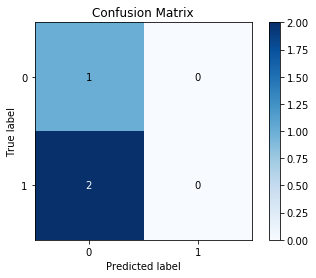

In [67]:
import matplotlib.pyplot as plt
import scikitplot as skplot
skplot.metrics.plot_confusion_matrix(ytest,lResult)
plt.show()